In [204]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
#plt.rcParams['axes.unicode_minus'] =False
#plt.rc('font', family='NanumGothic')
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='Microsoft Sans Serif'
plt.rcParams['axes.unicode_minus'] =False
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter

In [201]:
import matplotlib.font_manager

# Get all available font names
font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]

# Print the font names
for font_name in font_names:
    if 'Serif' in font_name: print(font_name)

DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
MS Reference Sans Serif
Microsoft Sans Serif


In [3]:
raw_x = pd.read_csv('../Data/train_wd_hc.csv', index_col = 0)

In [6]:
subwayinfo_x = pd.read_csv('../Data/raw_x_info.csv', index_col = 0)
#Get land use mix entropy
for k, v in subwayinfo_x.iterrows():
    p1, p2, p3, p4, p5 = float(v['tfa_r'])/float(v['buld_sum']), float(v['tfa_c'])/float(v['buld_sum']), float(v['tfa_w'])/float(v['buld_sum']), float(v['tfa_n'])/float(v['buld_sum']), float(v['tfa_f'])/float(v['buld_sum'])
    subwayinfo_x.at[k,'lumix'] = -1 * (np.log(p1)*p1 + np.log(p2)*p2 + np.log(p3)*p3 + np.log(p4)*p4 + np.log(p5)*p5)
subwayinfo_x

,id,name,transfer,outer,terminal,cbd,tfa_r,tfa_c,tfa_w,univ,pop,job,bus,buld_sum,rest,green,tfa_n,tfa_f,lumix
0,8,문정,0,1,0,0,5.950293e+05,10703.902546,696574.801330,0,25099,81939,16,2.621679e+06,235.0,5572.857058,238224.339214,1.081147e+06,1.294415
1,6,가락시장,1,1,0,0,9.445868e+05,736955.778443,387790.658053,0,19987,76521,19,2.205514e+06,402.0,14522.685331,136180.024289,1.000000e+00,1.207038
2,81,길음,0,1,0,0,1.299724e+06,17039.077686,7735.150792,0,33785,10339,34,1.424060e+06,186.0,68232.088858,98720.250750,8.412070e+02,0.354080
3,111,용마산,0,0,0,0,8.736765e+05,6194.289185,12197.011847,0,29562,7478,13,1.038716e+06,224.0,208236.288456,142991.921337,3.656419e+03,0.521137
4,240,서울대입구,0,0,0,1,8.032225e+05,32867.589911,390383.748375,0,41404,20820,23,1.801036e+06,916.0,6350.250206,572014.669723,2.546960e+03,1.138154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,서원,0,0,0,0,9.992740e+05,6583.094783,14637.278241,0,36212,9058,21,1.198391e+06,251.0,109236.090216,177895.485501,1.000000e+00,0.517085
298,292,금천구청,0,1,0,0,1.214539e+06,810.838855,109804.034506,0,19339,8593,18,1.460943e+06,141.0,27069.717284,98987.622563,3.680082e+04,0.627367
299,288,가산디지털단지,1,0,0,0,1.787776e+05,77717.816360,374239.234863,0,11730,168764,33,3.581268e+06,745.0,NaN,246548.573977,2.703985e+06,0.865149
300,293,양평,0,0,0,1,5.134311e+05,55311.852416,295862.554748,0,18101,29880,19,1.322443e+06,311.0,NaN,268628.391763,1.892089e+05,1.437046


In [37]:
cluster1 = ['태릉입구', '석촌']
cluster2 = ['강남', '홍대입구']
cluster3 = ['역삼', '선릉']
cluster4 = ['교대', '공덕']
cluster5 = ['상봉', '수유']
cluster6 = ['중화', '상도']

In [234]:
sample = raw_x[['id', 'name']].merge(subwayinfo_x, on = ['id', 'name'], how = 'left')
xs = ['name', 'transfer', 'outer', 'terminal', 'cbd',
       'tfa_r', 'tfa_n', 'tfa_c', 'tfa_w','tfa_f', 'green',  'buld_sum', 'lumix', 'pop', 'job', 'bus','rest','univ']

In [235]:
drawing = sample[sample['name'].isin(cluster1+cluster2+cluster3+cluster4+cluster5+cluster6)][xs]
drawing.fillna(0, inplace = True)

In [236]:
def apply_cluster(n):
    if n in cluster1:
        return 1
    elif n in cluster2:
        return 2
    elif n in cluster3:
        return 3
    elif n in cluster4:
        return 4
    elif n in cluster5:
        return 5
    else: return 6

for k, v in drawing.iterrows():
    drawing.at[k,'cluster'] = apply_cluster(v['name'])

In [237]:
drawing

,name,transfer,outer,terminal,cbd,tfa_r,tfa_n,tfa_c,tfa_w,tfa_f,green,buld_sum,lumix,pop,job,bus,rest,univ,cluster
49,태릉입구,1,0,0,0,1.114343e+06,1.407566e+05,3816.019066,1.672744e+04,1.000000,628.846008,1.275644e+06,0.435535,30648,13730,37,418.0,0,1.0
66,석촌,0,1,0,0,1.099820e+06,3.561916e+05,14067.827463,5.113018e+04,1.000000,24303.296740,1.521210e+06,0.731807,34947,35635,14,653.0,0,1.0
83,강남,1,1,0,1,7.946895e+05,1.368045e+06,35416.677875,1.417987e+06,27376.825451,14134.444063,3.643515e+06,1.148995,14984,94917,39,1219.0,0,2.0
86,상도,0,0,0,0,1.457362e+06,2.066849e+05,3332.660547,2.295779e+04,1.000000,21862.662907,1.690338e+06,0.455496,40429,6543,30,268.0,0,6.0
89,역삼,0,0,0,1,4.946395e+05,9.414305e+05,30807.143074,1.460029e+06,1.000000,384.510745,2.926907e+06,1.060169,16429,112193,10,1186.0,0,3.0
115,선릉,1,0,0,1,8.444139e+05,9.556260e+05,900620.152133,9.398294e+05,1.000000,110799.096953,3.640490e+06,1.385178,18599,98288,13,1022.0,0,3.0
128,홍대입구,1,1,0,0,6.524755e+05,6.248792e+05,135412.768823,2.063209e+05,753.673557,0.000000,1.619842e+06,1.207226,19974,35006,21,1505.0,0,2.0
135,공덕,1,1,0,0,1.377127e+06,4.816221e+05,20941.492497,5.794790e+05,595.475391,0.000000,2.459765e+06,1.027213,31014,59442,36,793.0,0,4.0
139,중화,0,0,0,0,8.560284e+05,2.855560e+05,11253.624073,1.790374e+04,1.000000,8963.847162,1.170743e+06,0.681660,30570,8863,32,398.0,0,6.0
144,상봉,1,0,0,0,1.143866e+06,2.674291e+05,62583.812721,7.261502e+04,218.963949,0.000000,1.546713e+06,0.801216,36596,13094,14,505.0,0,5.0


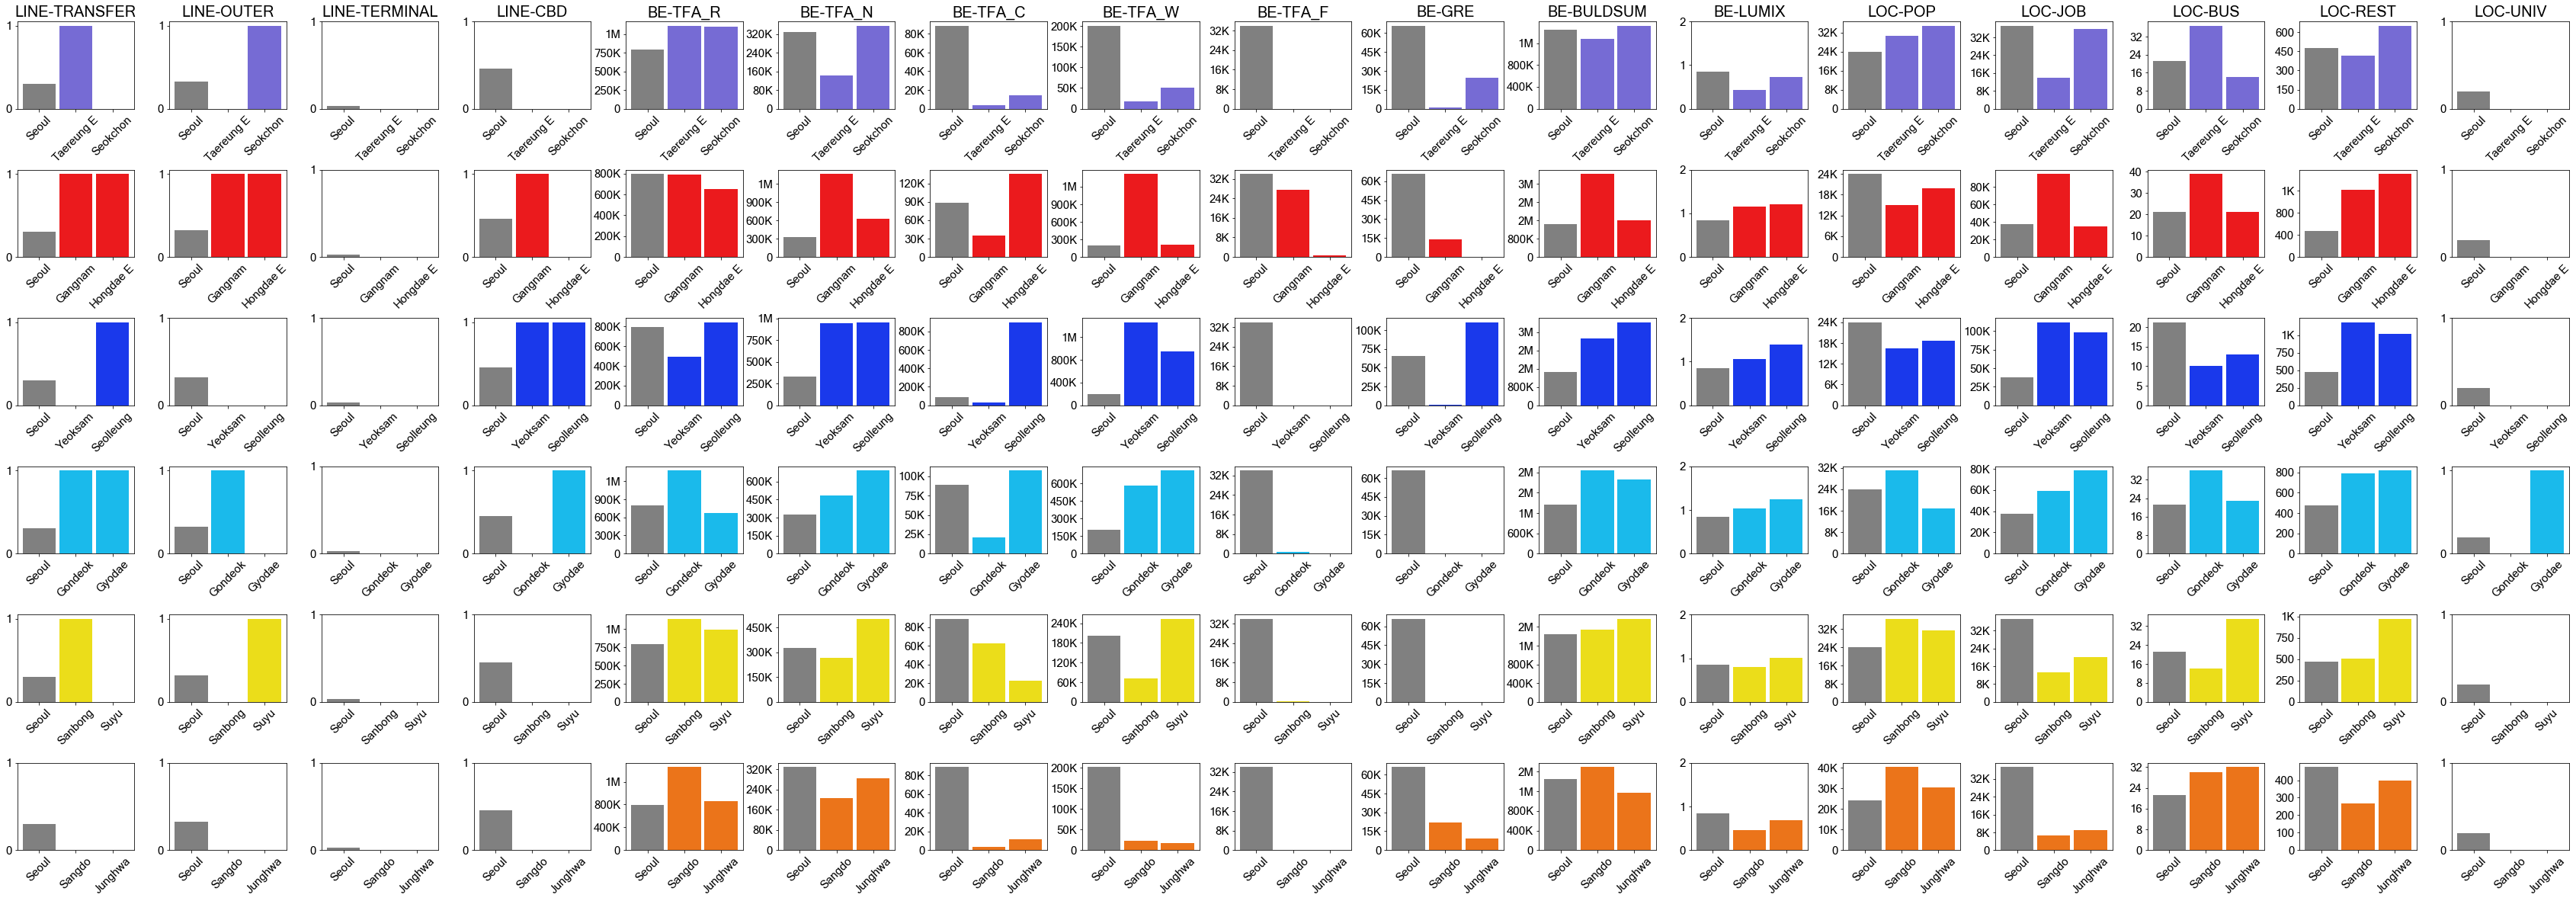

In [256]:
fig, axes = plt.subplots(6, 17, figsize = (60, 20))
plt.subplots_adjust(hspace=0.7, wspace = 0.3)

width = 0.9
num_bar = 3
x = np.arange(num_bar)

# Function to format ticks
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

cluster_names = ['NWA', 'DCA', 'BD', 'SBA', 'RA', 'SRA']
variable_names = ['LINE-TRANSFER', 'LINE-OUTER', 'LINE-TERMINAL', 'LINE-CBD', 'BE-TFA_R', 'BE-TFA_N', 'BE-TFA_C', 'BE-TFA_W', 'BE-TFA_F', 'BE-GRE', 'BE-BULDSUM', 'BE-LUMIX', 'LOC-POP', 'LOC-JOB', 'LOC-BUS', 'LOC-REST', 'LOC-UNIV']
color_code = {1: '#766bd4', 2: '#eb1a1d', 3: '#1a39eb', 4: '#1abaeb', 5:'#ebdd1a', 6: '#eb741a'}
en_name = {'태릉입구': 'Taereung E','석촌': 'Seokchon', '강남':'Gangnam', '홍대입구': 'Hongdae E', '역삼': 'Yeoksam', '선릉': 'Seolleung',
           '공덕': 'Gondeok', '교대': 'Gyodae', '상봉': 'Sanbong', '수유': 'Suyu', '상도': 'Sangdo','중화': 'Junghwa'}
for r in range(6):
    cluster_df = drawing[drawing['cluster'] == r+1]
    cluster_df1 = cluster_df.iloc[0]
    cluster_df2 = cluster_df.iloc[1]
    colors = color_code[r+1]
    x = ['Seoul', en_name[cluster_df1['name']], en_name[cluster_df2['name']]]
    for c in range(17):
        ys = [sample[xs].drop(columns = ['name']).mean()[c], cluster_df1[xs[1:]][c], cluster_df2[xs[1:]][c]]
        axes[r, c].bar(x[0], ys[0], width, color = 'grey')
        axes[r, c].bar(x[1], ys[1], width, color = colors)
        axes[r, c].bar(x[2], ys[2], width, color = colors)

        axes[r, c].tick_params(axis = 'x', rotation = 45, labelsize = 15)
        axes[r, c].tick_params(axis = 'y', labelsize = 15)
        if c == 11: axes[r, c].set_yticks([0, 1, 2])
        elif (c > 3) and (c < 16): axes[r, c].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
        else: axes[r, c].set_yticks([0, 1])
        axes[r, c].yaxis.set_major_formatter(FuncFormatter(format_ticks))
        #if r == 0: axes[r, c].title.set_text(variable_names[c])
        if r == 0: axes[r, c].set_title(variable_names[c], fontsize = 20)
plt.savefig('../Result/x_data.pdf')

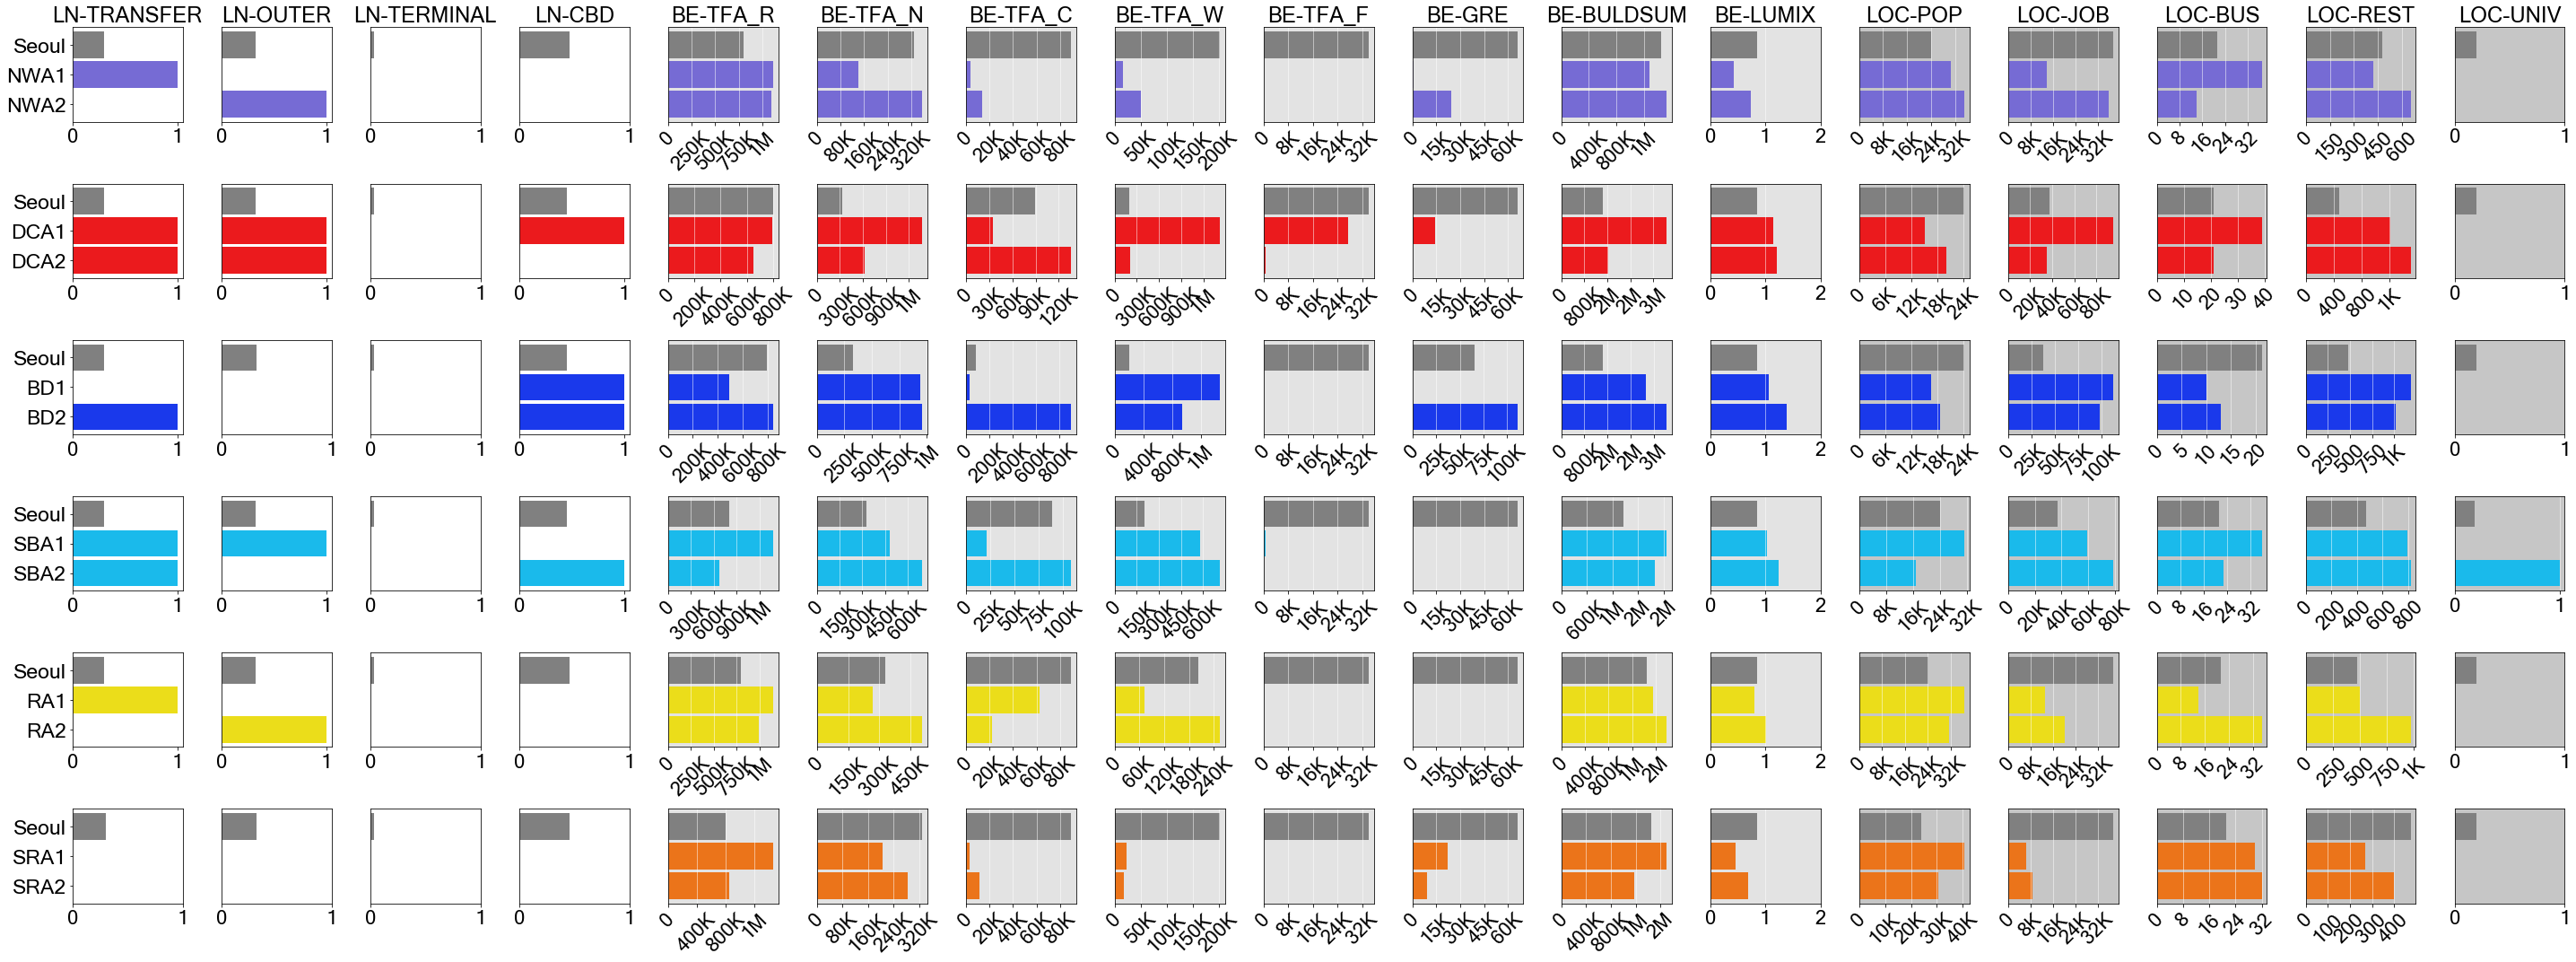

In [367]:
fig, axes = plt.subplots(6, 17, figsize = (40, 15))
plt.subplots_adjust(hspace=0.7)

width = 0.9
num_bar = 3
x = np.arange(num_bar)

# Function to format ticks
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

cluster_names = ['NWA', 'DCA', 'BD', 'SBA', 'RA', 'SRA']
variable_names = ['LN-TRANSFER', 'LN-OUTER', 'LN-TERMINAL', 'LN-CBD', 'BE-TFA_R', 'BE-TFA_N', 'BE-TFA_C', 'BE-TFA_W', 'BE-TFA_F', 'BE-GRE', 'BE-BULDSUM', 'BE-LUMIX', 'LOC-POP', 'LOC-JOB', 'LOC-BUS', 'LOC-REST', 'LOC-UNIV']
color_code = {1: '#766bd4', 2: '#eb1a1d', 3: '#1a39eb', 4: '#1abaeb', 5:'#ebdd1a', 6: '#eb741a'}
en_name = {'태릉입구': 'Taereung E','석촌': 'Seokchon', '강남':'Gangnam', '홍대입구': 'Hongdae E', '역삼': 'Yeoksam', '선릉': 'Seolleung',
           '공덕': 'Gondeok', '교대': 'Gyodae', '상봉': 'Sanbong', '수유': 'Suyu', '상도': 'Sangdo','중화': 'Junghwa'}

en_name2 = {'태릉입구': 'NWA1','석촌': 'NWA2', '강남':'DCA1', '홍대입구': 'DCA2', '역삼': 'BD1', '선릉': 'BD2',
           '공덕': 'SBA1', '교대': 'SBA2', '상봉': 'RA1', '수유': 'RA2', '상도': 'SRA1','중화': 'SRA2'}

for r in range(6):
    cluster_df = drawing[drawing['cluster'] == r+1]
    cluster_df1 = cluster_df.iloc[0]
    cluster_df2 = cluster_df.iloc[1]
    colors = color_code[r+1]
    x = [en_name2[cluster_df2['name']],en_name2[cluster_df1['name']], 'Seoul']
    for c in range(17):
        ys = [sample[xs].drop(columns = ['name']).mean()[c], cluster_df1[xs[1:]][c], cluster_df2[xs[1:]][c]]
        axes[r, c].barh(x[0], ys[2], width, color = colors)
        axes[r, c].barh(x[1], ys[1], width, color = colors)
        axes[r, c].barh(x[2], ys[0], width, color = 'grey')

        axes[r, c].tick_params(axis = 'y', labelsize = 23)
        axes[r, c].tick_params(axis = 'x', rotation = 45, labelsize = 0)

        if c < 4: axes[r,c].set_facecolor('white')
        elif (c >= 4) and (c < 12): axes[r,c].set_facecolor('#e3e3e3')
        else: axes[r,c].set_facecolor('#c6c6c6')


        if c == 11:
            axes[r, c].set_xticks([0, 1, 2])
            axes[r, c].tick_params(axis = 'x', rotation = 0, labelsize = 22)
        elif (c > 3) and (c < 16):
            axes[r, c].xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
            axes[r, c].tick_params(axis = 'x', rotation = 45, labelsize = 22)
        else:
            axes[r, c].set_xticks([0, 1])
            axes[r, c].tick_params(axis = 'x', rotation = 0, labelsize = 22)
        if c > 0: axes[r, c].set_yticks([''])
        axes[r, c].xaxis.set_major_formatter(FuncFormatter(format_ticks))
        axes[r, c].grid(axis = 'x', linewidth = 0.5, color = 'white')
        #if r == 0: axes[r, c].title.set_text(variable_names[c])
        if r == 0: axes[r, c].set_title(variable_names[c], fontsize = 24)
fig.tight_layout()
plt.savefig('../Result/x_data_h.pdf')

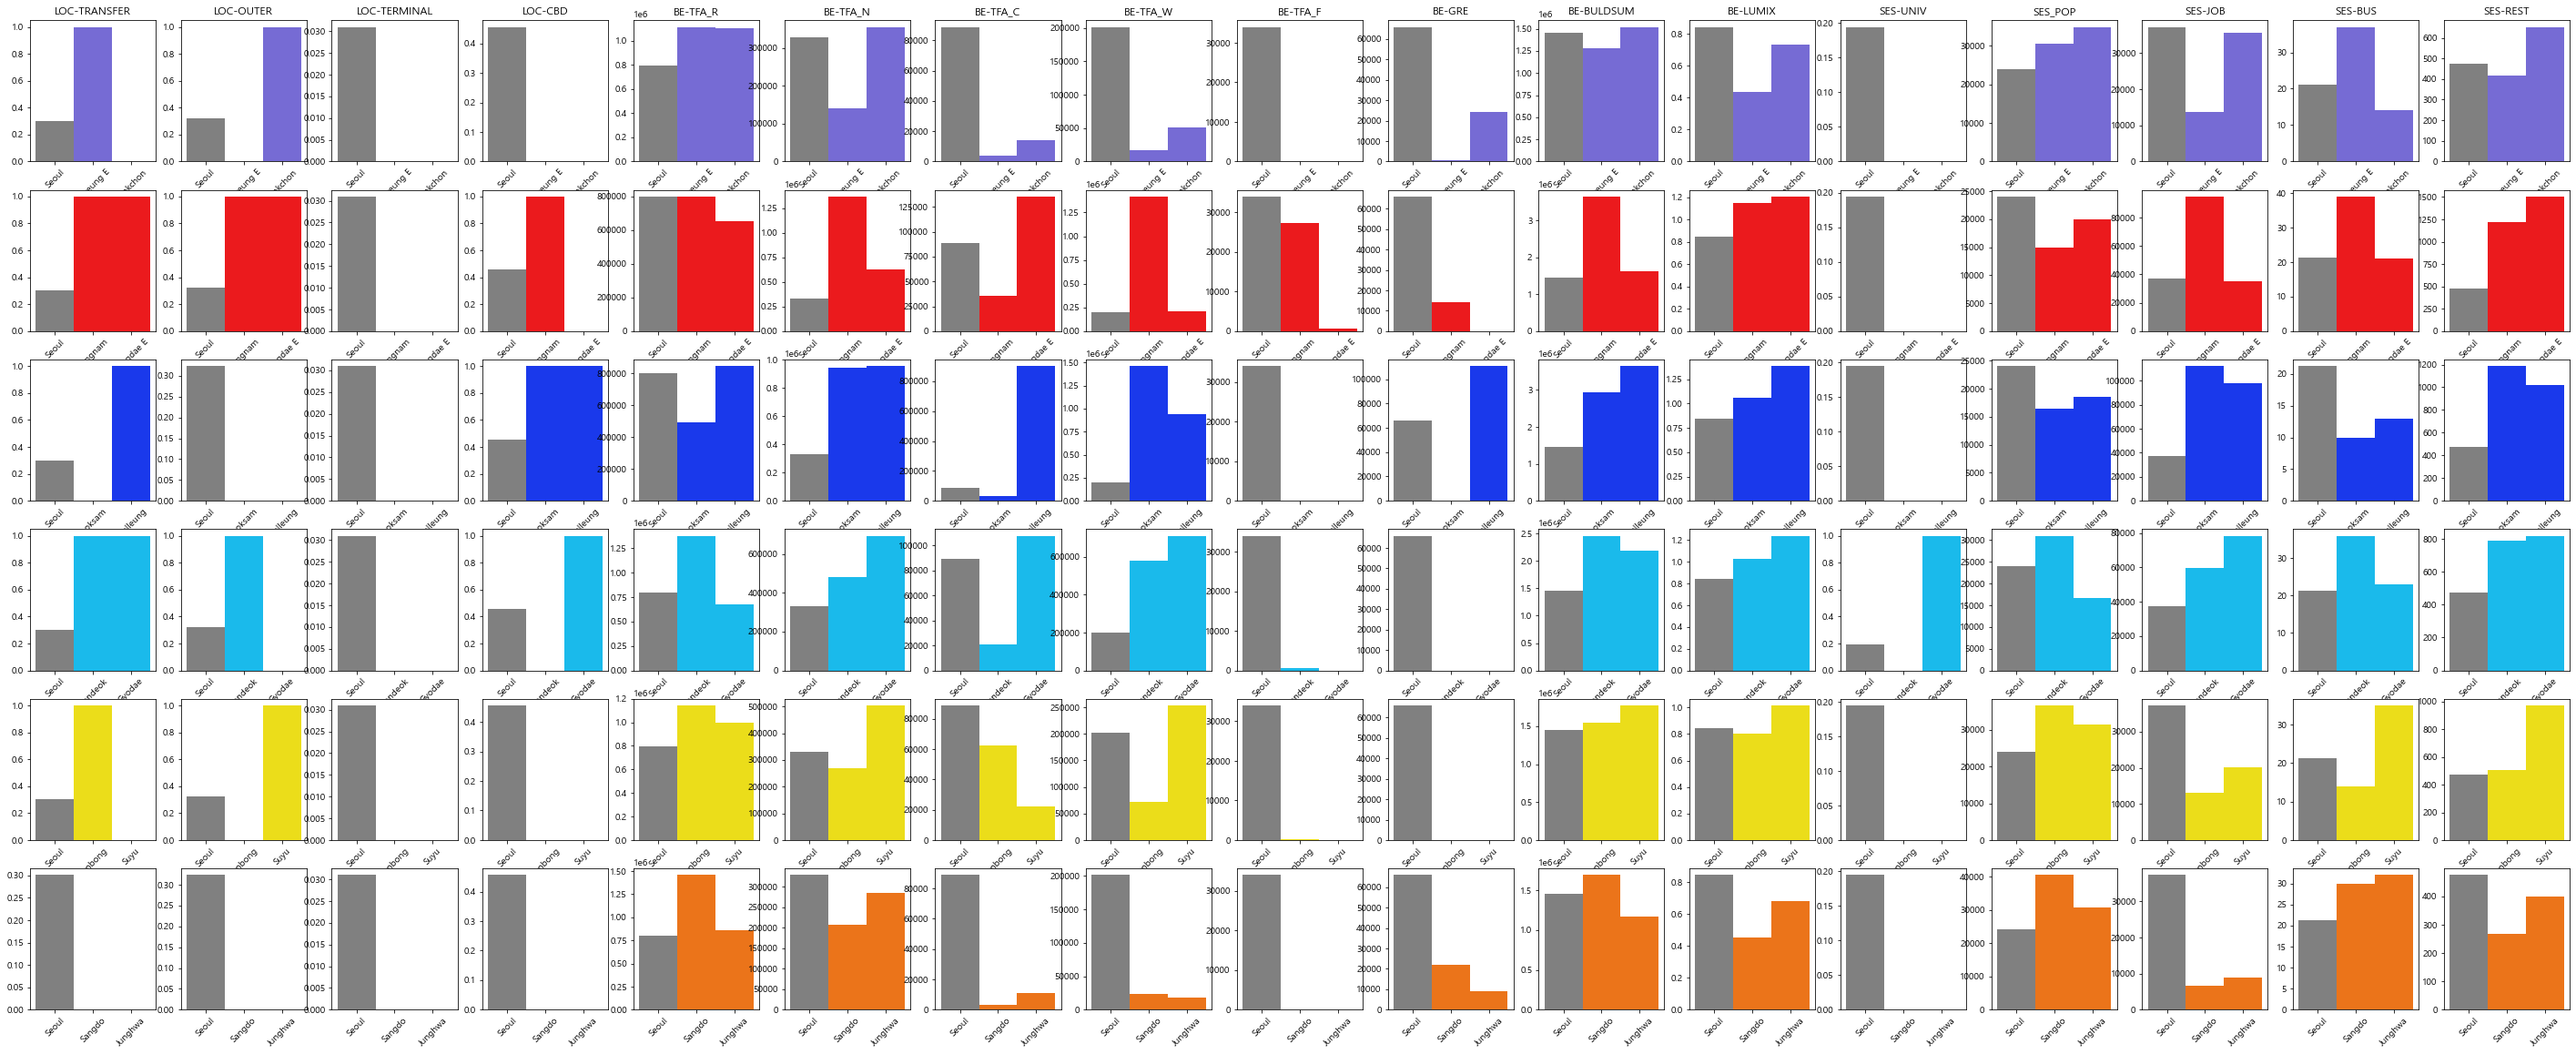

In [192]:
fig, axes = plt.subplots(6, 17, figsize = (50, 20))

width = 1
num_bar = 3
x = np.arange(num_bar)

cluster_names = ['NWA', 'DCA', 'BD', 'SBA', 'RA', 'SRA']
variable_names = ['LOC-TRANSFER', 'LOC-OUTER', 'LOC-TERMINAL', 'LOC-CBD', 'BE-TFA_R', 'BE-TFA_N', 'BE-TFA_C', 'BE-TFA_W', 'BE-TFA_F', 'BE-GRE', 'BE-BULDSUM', 'BE-LUMIX', 'SES-UNIV', 'SES_POP', 'SES-JOB', 'SES-BUS', 'SES-REST']
color_code = {1: '#766bd4', 2: '#eb1a1d', 3: '#1a39eb', 4: '#1abaeb', 5:'#ebdd1a', 6: '#eb741a'}
en_name = {'태릉입구': 'Taereung E','석촌': 'Seokchon', '강남':'Gangnam', '홍대입구': 'Hongdae E', '역삼': 'Yeoksam', '선릉': 'Seolleung',
           '공덕': 'Gondeok', '교대': 'Gyodae', '상봉': 'Sanbong', '수유': 'Suyu', '상도': 'Sangdo','중화': 'Junghwa'}
for r in range(6):
    cluster_df = drawing[drawing['cluster'] == r+1]
    cluster_df1 = cluster_df.iloc[0]
    cluster_df2 = cluster_df.iloc[1]
    colors = color_code[r+1]
    x = ['Seoul', en_name[cluster_df1['name']], en_name[cluster_df2['name']]]
    for c in range(17):
        axes[r, c].bar(x[0], sample[xs].drop(columns = ['name']).mean()[c], width, color = 'grey')
        axes[r, c].bar(x[1], cluster_df1[xs[1:]][c], width, color = colors)
        axes[r, c].bar(x[2], cluster_df2[xs[1:]][c], width, color = colors)
        axes[r, c].tick_params(axis = 'x', rotation = 45)
        if r == 0: axes[r, c].title.set_text(variable_names[c])

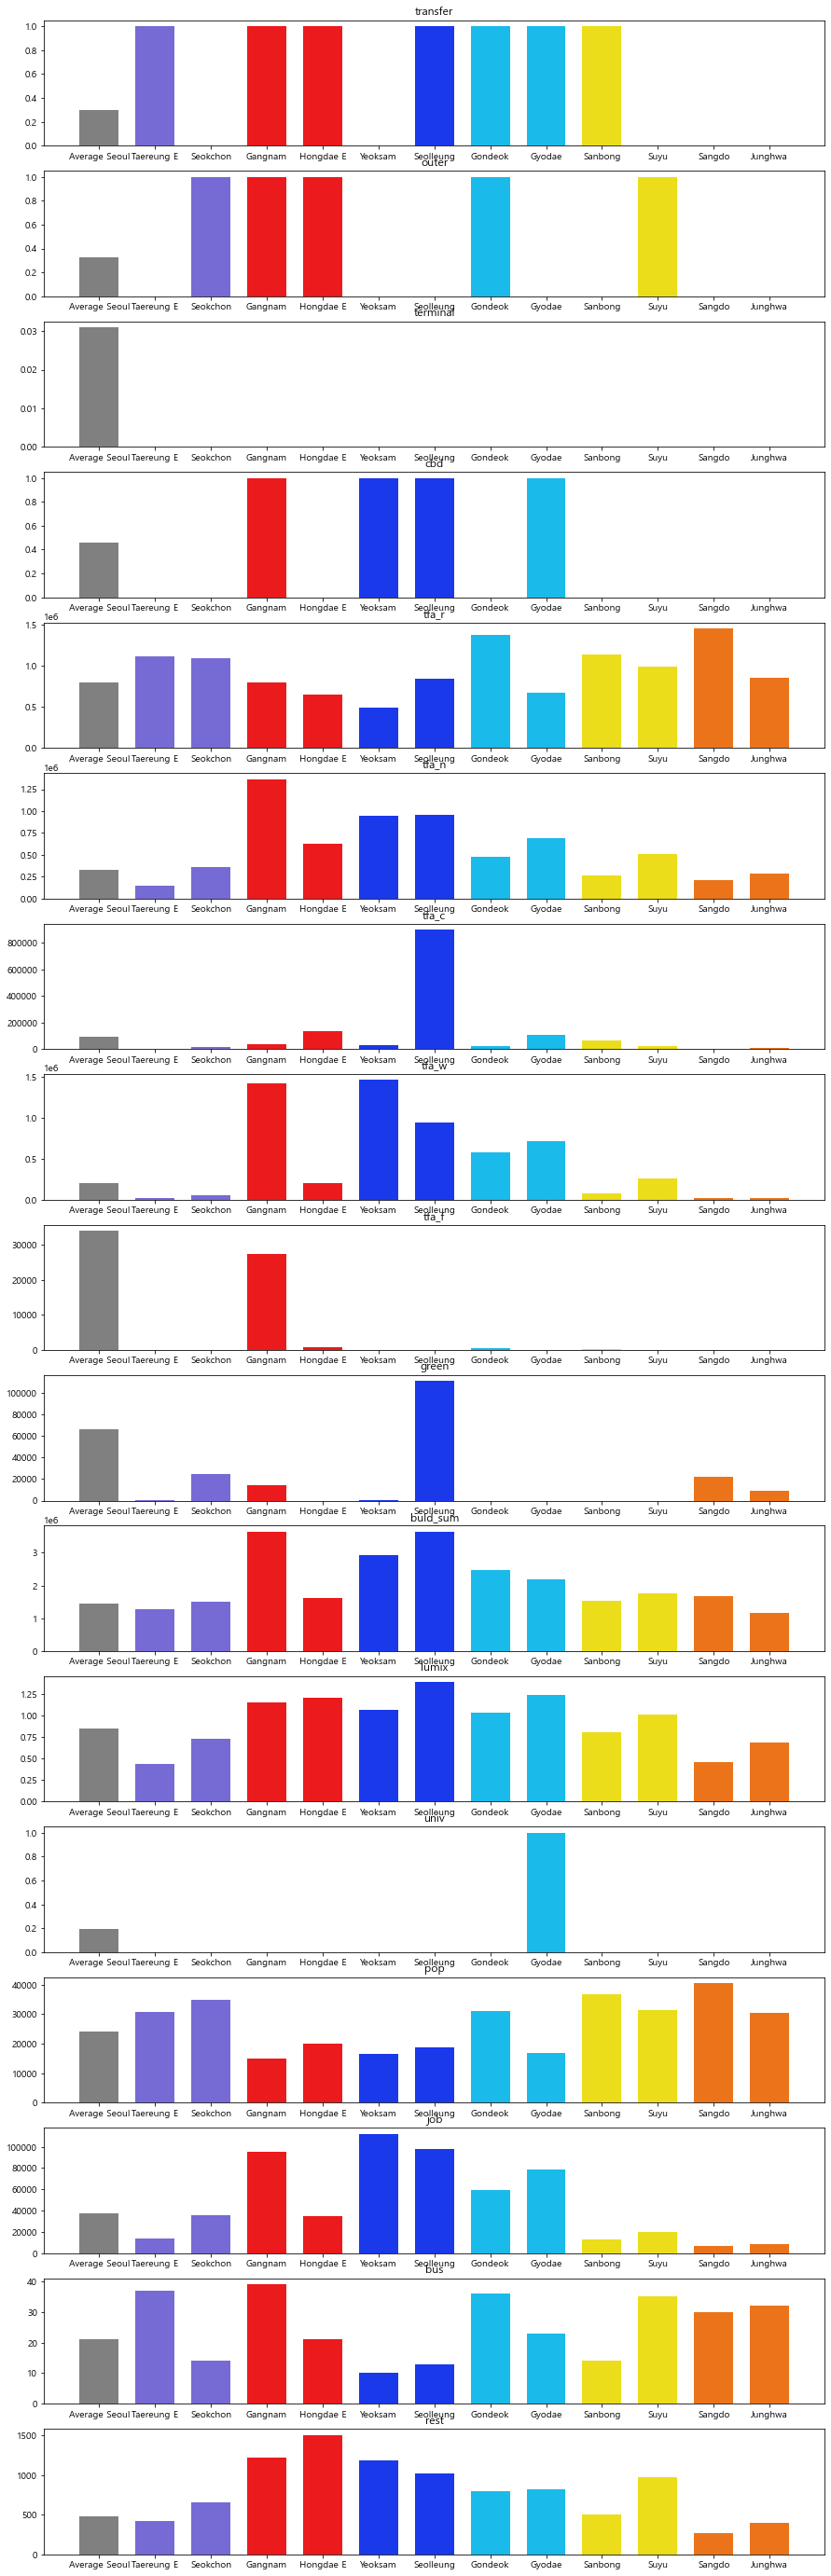

In [171]:
fig, axes = plt.subplots(17, 1, figsize = (15, 50))

width = 0.7
num_bar = 13
x = np.arange(num_bar)
x_labels = ['Average Seoul', 'Taereung E', 'Seokchon', 'Gangnam', 'Hongdae E', 'Yeoksam', 'Seolleung',
            'Gondeok', 'Gyodae', 'Sanbong', 'Suyu', 'Sangdo', 'Junghwa']
color_code = {1: '#766bd4', 2: '#eb1a1d', 3: '#1a39eb', 4: '#1abaeb', 5:'#ebdd1a', 6: '#eb741a'}
count = 0
for r in range(17):
    axes[r].bar(x_labels[0], sample[xs].drop(columns = ['name']).mean()[r], width, color = 'grey')
    axes[r].set_title(xs[r+1])
    for cluster in range(6):
        cluster_df = drawing[drawing['cluster'] == cluster+1]
        cluster_df1 = cluster_df.iloc[0]
        cluster_df2 = cluster_df.iloc[1]
        colors = color_code[cluster+1]
        axes[r].bar(x_labels[(cluster+1)*2-1], cluster_df1[xs[1:]][r], width, color = colors)
        axes[r].bar(x_labels[(cluster+1)*2], cluster_df2[xs[1:]][r], width, color = colors)
        

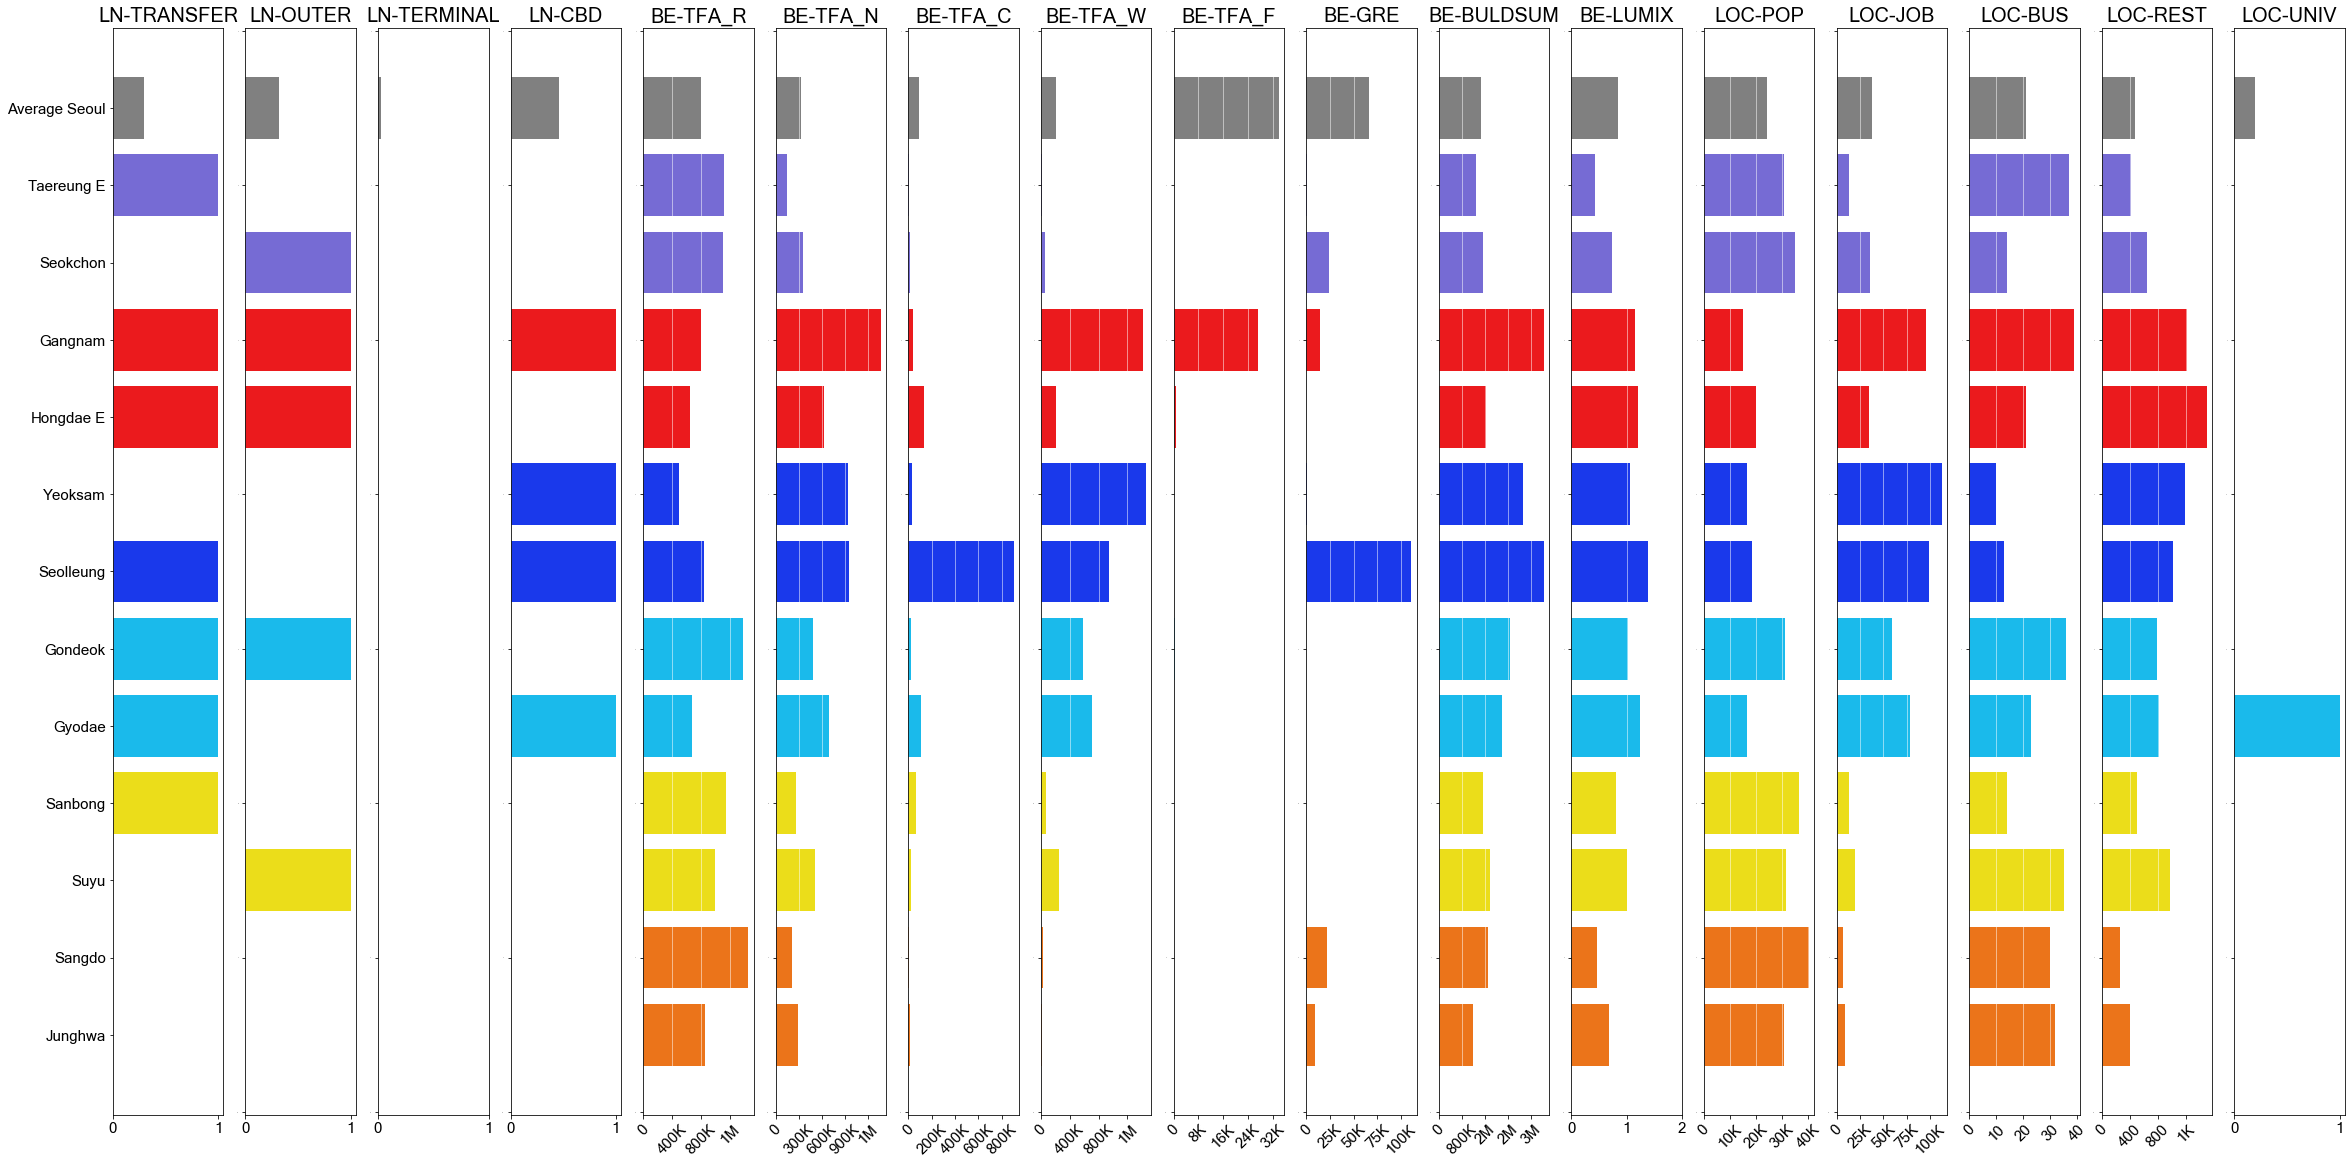

In [344]:
fig, axes = plt.subplots(1, 17, figsize = (40, 20))

width = 0.1
num_bar = 3
x = np.arange(num_bar)

# Function to format ticks
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

cluster_names = ['NWA', 'DCA', 'BD', 'SBA', 'RA', 'SRA']
variable_names = ['LN-TRANSFER', 'LN-OUTER', 'LN-TERMINAL', 'LN-CBD', 'BE-TFA_R', 'BE-TFA_N', 'BE-TFA_C', 'BE-TFA_W', 'BE-TFA_F', 'BE-GRE', 'BE-BULDSUM', 'BE-LUMIX', 'LOC-POP', 'LOC-JOB', 'LOC-BUS', 'LOC-REST', 'LOC-UNIV']
color_code = {1: '#766bd4', 2: '#eb1a1d', 3: '#1a39eb', 4: '#1abaeb', 5:'#ebdd1a', 6: '#eb741a'}
en_name = {'태릉입구': 'Taereung E','석촌': 'Seokchon', '강남':'Gangnam', '홍대입구': 'Hongdae E', '역삼': 'Yeoksam', '선릉': 'Seolleung',
           '공덕': 'Gondeok', '교대': 'Gyodae', '상봉': 'Sanbong', '수유': 'Suyu', '상도': 'Sangdo','중화': 'Junghwa'}

x_labels = ['Average Seoul']
num_bars = 13
Yaxis = np.arange(num_bars) - 9
width = 0.8
for c in range(17):
    ys = [sample[xs].drop(columns = ['name']).mean()[c]]
    axes[c].barh(num_bar, ys[0], width, color = 'grey', label = 'Avg.Seoul')
    for r in range(6):
        cluster_df = drawing[drawing['cluster'] == r+1]
        cluster_df1 = cluster_df.iloc[0]
        cluster_df2 = cluster_df.iloc[1]

        x_labels.append(en_name[cluster_df1['name']])
        x_labels.append(en_name[cluster_df2['name']])

        axes[c].barh(num_bar-(2*(r+1)-1), cluster_df1[xs[1:]][c], width, color = color_code[r+1], label = en_name[cluster_df1['name']])
        axes[c].barh(num_bar-(2*(r+1)), cluster_df2[xs[1:]][c], width, color = color_code[r+1], label = en_name[cluster_df2['name']])
    
    if c < 1:
        axes[c].set_yticks(np.flip(Yaxis), x_labels)
        axes[c].tick_params(axis = 'y', labelsize = 15)
    else: axes[c].tick_params(axis = 'y', labelsize = 0)    

    if c == 11:
        axes[c].set_xticks([0, 1, 2])
        axes[c].tick_params(axis = 'x', rotation = 0, labelsize = 15)
    elif (c > 3) and (c < 16):
        axes[c].xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
        axes[c].tick_params(axis = 'x', rotation = 45, labelsize = 15)
    else:
        axes[c].set_xticks([0, 1])
        axes[c].tick_params(axis = 'x', rotation = 0, labelsize = 15)
    
    axes[c].xaxis.set_major_formatter(FuncFormatter(format_ticks))
    axes[c].grid(axis = 'x', linewidth = 0.5, color = 'white')
    axes[c].set_title(variable_names[c], fontsize = 20)
    x_labels = ['Average Seoul']
    
#plt.savefig('../Result/x_data_h.pdf')

array([ 3,  2,  1,  0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

TypeError: unhashable type: 'numpy.ndarray'

c:\Users\Chulwoong Park\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Chulwoong Park\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Chulwoong Park\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Chulwoong Park\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


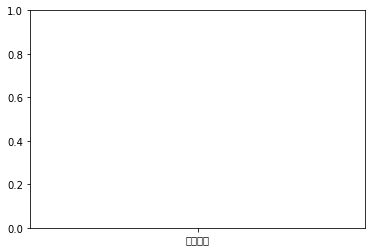

In [50]:
categories = ['Boulevard', 'Street', 'Road']
values_total, values_all_e, values_ndtp_e, values_dtp_e, values_adtp_e = dfs[0][0]['ratio'].tolist(), dfs[0][1]['ratio'].tolist(), dfs[0][2]['ratio'].tolist(), dfs[0][3]['ratio'].tolist(), dfs[0][4]['ratio'].tolist()
values_total, values_all_co, values_ndtp_co, values_dtp_co, values_adtp_co = dfs[1][0]['ratio'].tolist(), dfs[1][1]['ratio'].tolist(), dfs[1][2]['ratio'].tolist(), dfs[1][3]['ratio'].tolist(), dfs[1][4]['ratio'].tolist()
values_total, values_all_cl, values_ndtp_cl, values_dtp_cl, values_adtp_cl = dfs[2][0]['ratio'].tolist(), dfs[2][1]['ratio'].tolist(), dfs[2][2]['ratio'].tolist(), dfs[2][3]['ratio'].tolist(), dfs[2][4]['ratio'].tolist()
values_total, values_all_r, values_ndtp_r, values_dtp_r, values_adtp_r = dfs[3][0]['ratio'].tolist(), dfs[3][1]['ratio'].tolist(), dfs[3][2]['ratio'].tolist(), dfs[3][3]['ratio'].tolist(), dfs[3][4]['ratio'].tolist()

sets = ['Average in Seoul', 'NWA', 'DCA', 'BD', 'SBA', 'RA', 'SRA']
x = np.arange(len(categories))

width = 0.1
num_bar = len(sets)

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0,0].grid(axis = 'y', linestyle = '--')
ax[1,0].grid(axis = 'y', linestyle = '--')
ax[0,1].grid(axis = 'y', linestyle = '--')
ax[1,1].grid(axis = 'y', linestyle = '--')

bar01 = ax[0,0].bar(x-1/num_bar, values_total, width, label = sets[0], color = 'gray')
bar02 = ax[0,0].bar(x-1/num_bar*0.5, values_all_e, width, label = sets[1], color = 'yellow')
bar03 = ax[0,0].bar(x, values_ndtp_e, width, label = sets[2], color = '#c29ee0')
bar04 = ax[0,0].bar(x+1/num_bar*0.5, values_dtp_e, width, label = sets[3], color = '#a23ed4')
bar05 = ax[0,0].bar(x+1/num_bar, values_adtp_e, width, label = sets[4], color = '#ff01fb')

bar11 = ax[0,1].bar(x-1/num_bar, values_total, width, label = sets[0], color = 'gray')
bar12 = ax[0,1].bar(x-1/num_bar*0.5, values_all_co, width, label = sets[1], color = 'yellow')
bar13 = ax[0,1].bar(x, values_ndtp_co, width, label = sets[2], color = '#c29ee0')
bar14 = ax[0,1].bar(x+1/num_bar*0.5, values_dtp_co, width, label = sets[3], color = '#a23ed4')
bar15 = ax[0,1].bar(x+1/num_bar, values_adtp_co, width, label = sets[4], color = '#ff01fb')

bar21 = ax[1,0].bar(x-1/num_bar, values_total, width, label = sets[0], color = 'gray')
bar22 = ax[1,0].bar(x-1/num_bar*0.5, values_all_cl, width, label = sets[1], color = 'yellow')
bar23 = ax[1,0].bar(x, values_ndtp_cl, width, label = sets[2], color = '#c29ee0')
bar24 = ax[1,0].bar(x+1/num_bar*0.5, values_dtp_cl, width, label = sets[3], color = '#a23ed4')
bar25 = ax[1,0].bar(x+1/num_bar, values_adtp_cl, width, label = sets[4], color = '#ff01fb')

bar31 = ax[1,1].bar(x-1/num_bar, values_total, width, label = sets[0], color = 'gray')
bar32 = ax[1,1].bar(x-1/num_bar*0.5, values_all_r, width, label = sets[1], color = 'yellow')
bar33 = ax[1,1].bar(x, values_ndtp_r, width, label = sets[2], color = '#c29ee0')
bar34 = ax[1,1].bar(x+1/num_bar*0.5, values_dtp_r, width, label = sets[3], color = '#a23ed4')
bar35 = ax[1,1].bar(x+1/num_bar, values_adtp_r, width, label = sets[4], color = '#ff01fb')

# Add labels, title, and legend
ax[0,0].set_ylabel('Percentage')
ax[0,0].set_title('Eating')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(categories)
ax[0,0].set_ylim(0, 90)

ax[0,1].set_ylabel('Percentage')
ax[0,1].set_title('Commercial')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(categories)
ax[0,1].set_ylim(0, 90)

ax[1,0].set_ylabel('Percentage')
ax[1,0].set_title('Club')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(categories)
ax[1,0].set_ylim(0, 90)

ax[1,1].set_title('Recreation')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(categories)
ax[1,1].set_ylim(0, 90)
#ax[1,1].legend()


# Show the plot
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2aaa6f43400>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaa6f439a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaa6f43130>,
 'medians': [<matplotlib.lines.Line2D at 0x2aaa6f43f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x2aaa6f4b250>,
 'means': []}

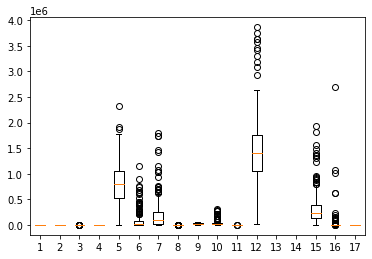

In [34]:
plt.boxplot(sample[['transfer', 'outer', 'terminal', 'cbd',
       'tfa_r', 'tfa_c', 'tfa_w', 'univ', 'pop', 'job', 'bus', 'buld_sum',
       'rest', 'green', 'tfa_n', 'tfa_f', 'lumix']])